# Training strategies

In [1]:
import copy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from statistics import mean 

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
original_data = copy.deepcopy(data)
target = 'DEATH_EVENT'
positive = 'positive'
negative = 'negative'
print(data[target].value_counts())
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}
y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


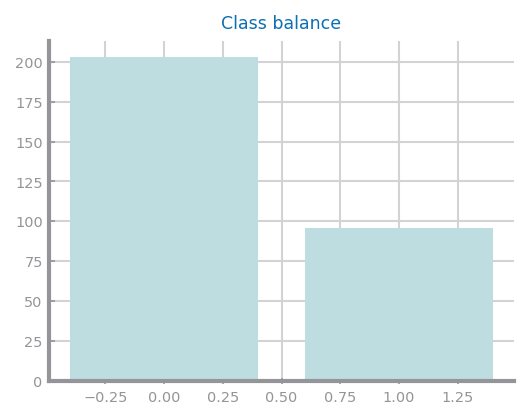

IS_TOXIC = Positive Minority class: 96
IS_TOXIC = Negative Majority class: 203
Proportion: 0.47 : 1


In [2]:
target_count = original_data[target].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('IS_TOXIC = Positive Minority class:', target_count[ind_min_class])
print('IS_TOXIC = Negative Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

Given the prior proportion, we consider that a Data Balancing Technique is needed.

# Unbalanced Naive Bayes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import *
import ds_functions as ds
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels = pd.unique(y)

# Preparing data for balancing

In [4]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')

In [5]:
import random
def balancing(trnX, trnY, undersample, oversample):
    #undersample, oversample = 1,0 => undersample
    #undersample, oversample = 0,1 => oversample
    unique, counts = np.unique(trnY, return_counts=True)
    
    min_positive_counts = min(counts)
    min_negative_counts = max(counts)+(min(counts)-max(counts))*undersample
    newtrnY: np.ndarray = []
    newtrnX: np.ndarray = []
    for idx in range(len(trnY)):
        if min_positive_counts > 0 and trnY[idx] == 1:
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_positive_counts -= 1
        elif min_negative_counts > 0 and trnY[idx] == 0:
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_negative_counts -= 1
            
    unique1, counts1 = np.unique(newtrnY, return_counts=True)
    
    max_positive_counts = min(counts1)+(max(counts1)-min(counts1))*oversample
    max_negative_counts = max(counts1)
    finaltrnY: np.ndarray = []
    finaltrnX: np.ndarray = []
    negX: np.ndarray = []
    posX: np.ndarray = []
    negY: np.ndarray = []
    posY: np.ndarray = []
        
    for idx in range(len(newtrnY)):
        if newtrnY[idx] == 0:
            finaltrnY.append(newtrnY[idx])
            negY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            negX.append(newtrnX[idx])
            max_negative_counts -= 1
        elif newtrnY[idx] == 1:
            finaltrnY.append(newtrnY[idx])
            posY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            posX.append(newtrnX[idx])
            max_positive_counts -= 1

    random.seed()

    while max_negative_counts > 0:
        rand_num = random.randint(0,len(negX)-1)
        finaltrnX.append(negX[rand_num])
        finaltrnY.append(negY[rand_num])
        max_negative_counts -= 1

    while max_positive_counts > 0:
        rand_num = random.randint(0,len(posX)-1)
        finaltrnX.append(posX[rand_num])
        finaltrnY.append(posY[rand_num])
        max_positive_counts -= 1
    
    return finaltrnX, finaltrnY
    

# SMOTE Naive Bayes

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

## Multinomial

Confusion Matrix Test
TruePositives:  1372
FalsePositives:  741
TrueNegatives:  2108
FalseNegatives:  1477


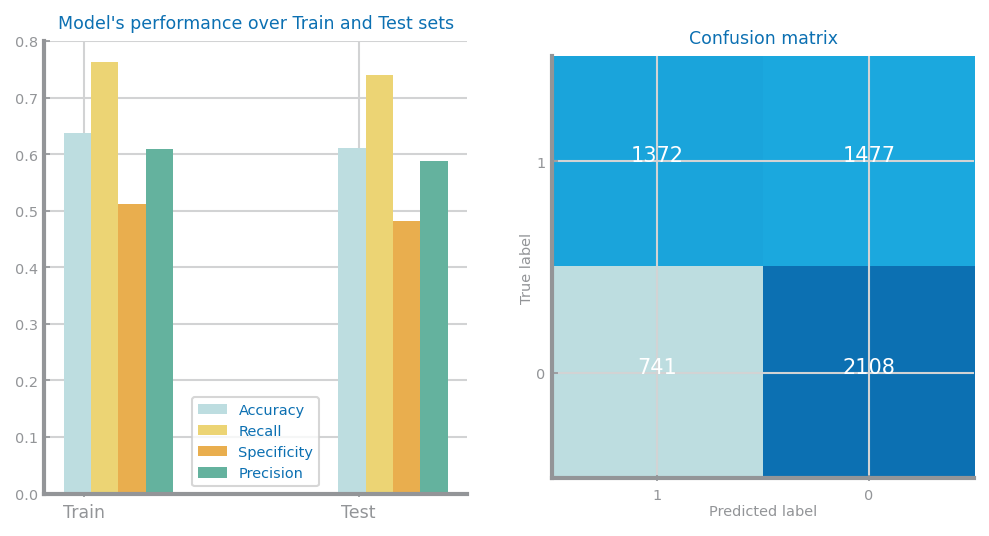

In [98]:
clf = MultinomialNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Gaussian

Confusion Matrix Test
TruePositives:  2106
FalsePositives:  568
TrueNegatives:  2262
FalseNegatives:  724


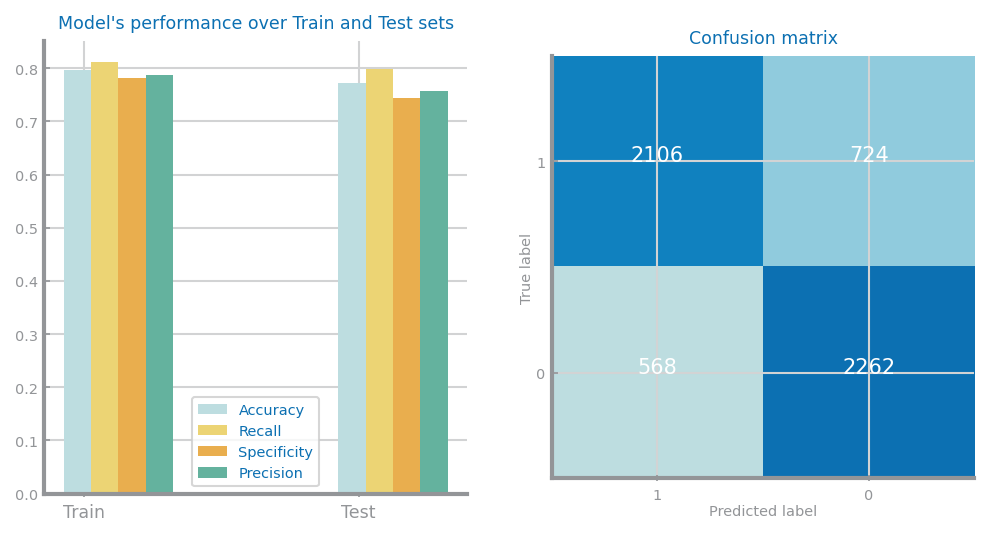

In [100]:
clf = GaussianNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

## Bernoulli

Confusion Matrix Test
TruePositives:  1046
FalsePositives:  948
TrueNegatives:  1886
FalseNegatives:  1788


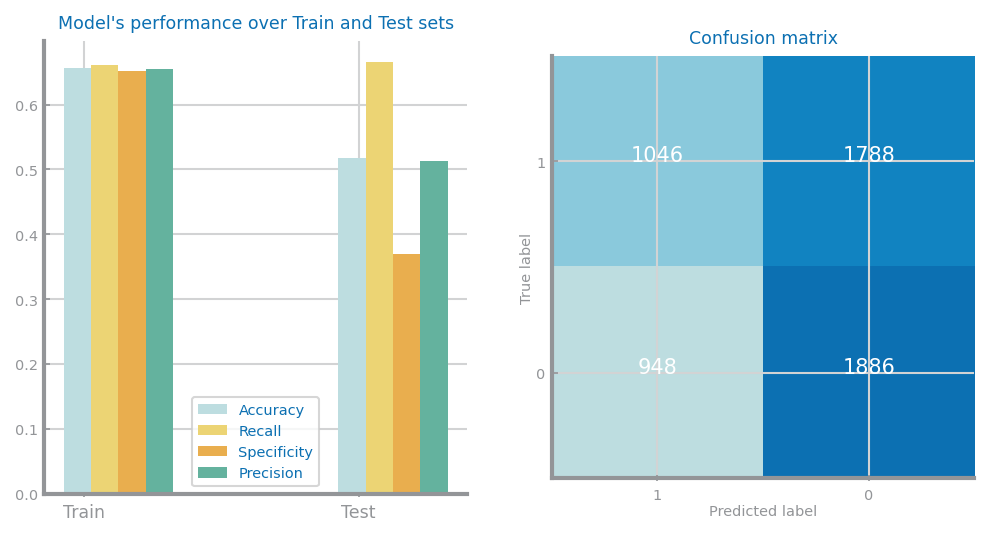

In [102]:
clf = BernoulliNB()
total_trnY = []
total_tstY = []
total_prd_trn = []
total_prd_tst = []
for ix in range(100):
    trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    for yi in smote_y:
        total_trnY.append(yi)
    for yi in tstY:
        total_tstY.append(yi)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    for prdi in prd_trn:
        total_prd_trn.append(prdi)
    for prdi in prd_tst:
        total_prd_tst.append(prdi)

ds.plot_evaluation_results(pd.unique(y), total_trnY, total_prd_trn, total_tstY, total_prd_tst)

With **SMOTE balancing**:
    -  *Multinomial Naive Bayes*
        -  *Accuracy*: 61%
        -  *Recall*: 74%
        -  *Specificity*:

# Scaling

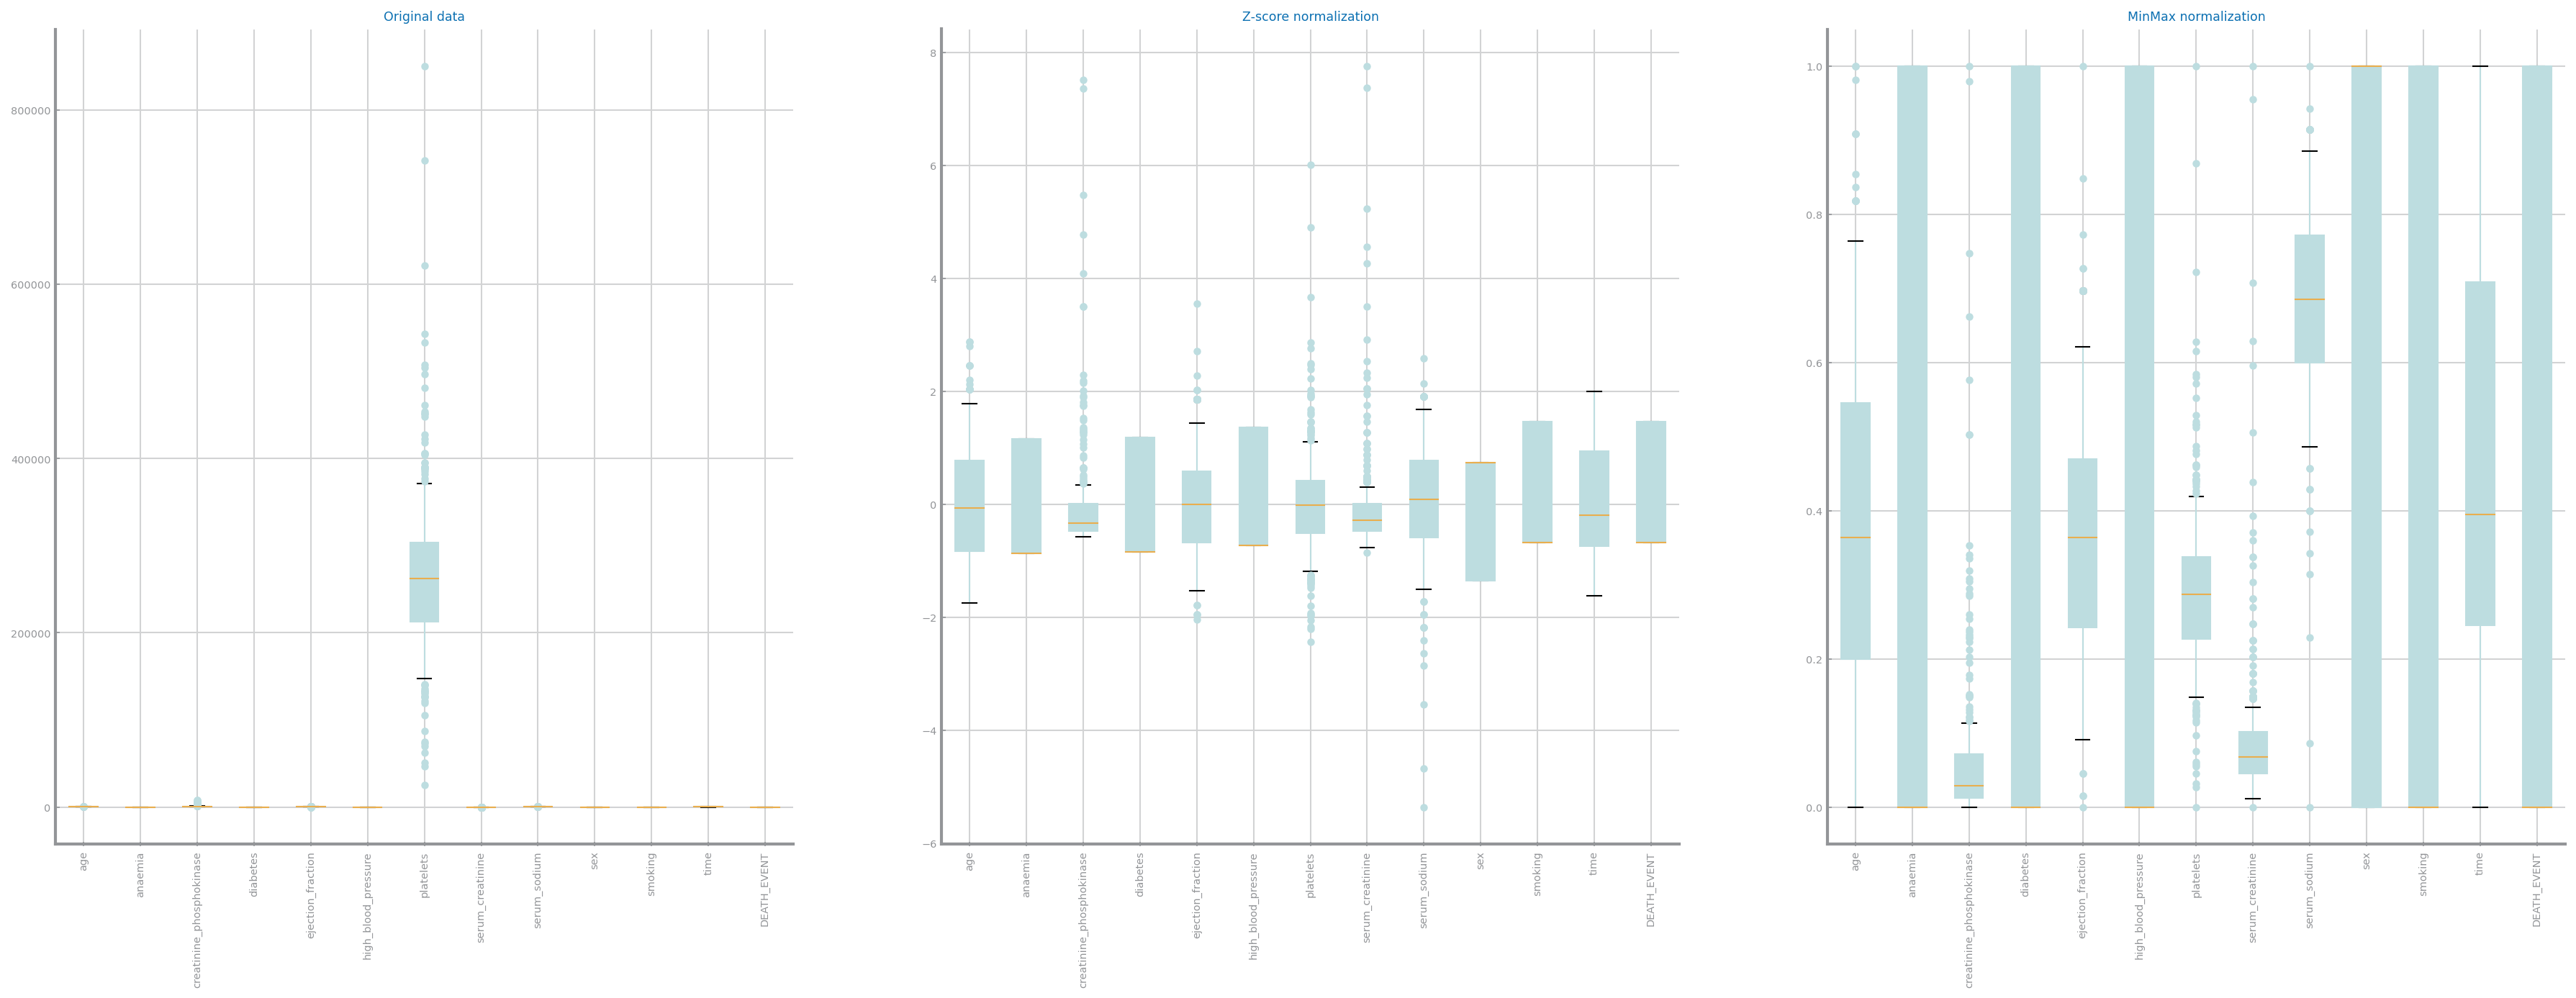

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_nr = pd.DataFrame(transf.transform(data), columns= data.columns)
norm_data_zscore = df_nr
norm_data_zscore.describe(include='all')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr
norm_data_minmax.describe(include='all')

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(30,10),squeeze=False )
axs[0, 0].set_title('Original data')
data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title('MinMax normalization')
# axs[0, 2].xticks(rotation=90)
norm_data_minmax.boxplot(ax=axs[0, 2])
# fig.tight_layout()
for i in range(3):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

In [16]:
Xz: np.ndarray = norm_data_zscore.values
XmM : np.ndarray = norm_data_minmax.values

## Multinomial

1.0 1.0
Confusion Matrix Test
TruePositives:  1967
FalsePositives:  732
TrueNegatives:  2137
FalseNegatives:  902


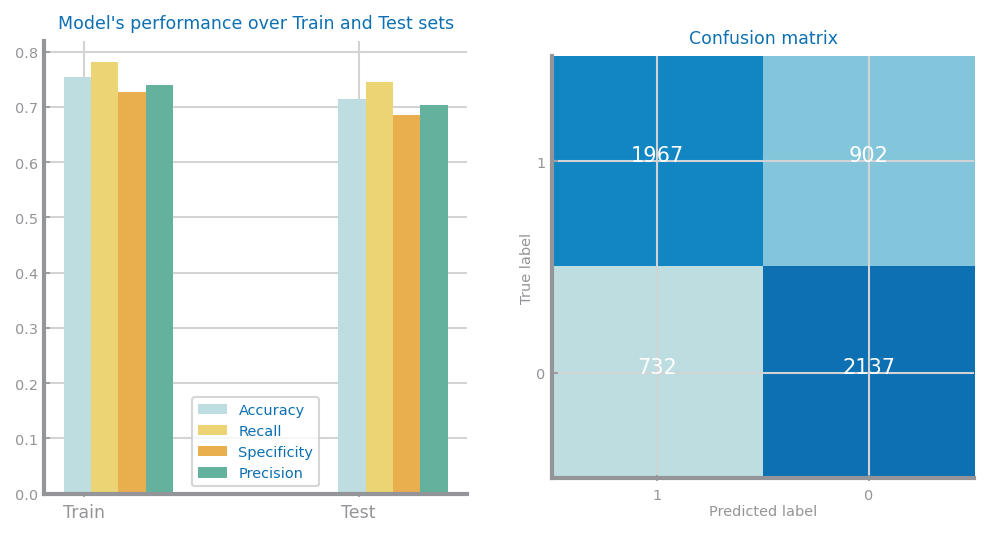

In [17]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = MultinomialNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian

0.4 1.0
Confusion Matrix Test
TruePositives:  1834
FalsePositives:  367
TrueNegatives:  2468
FalseNegatives:  1001


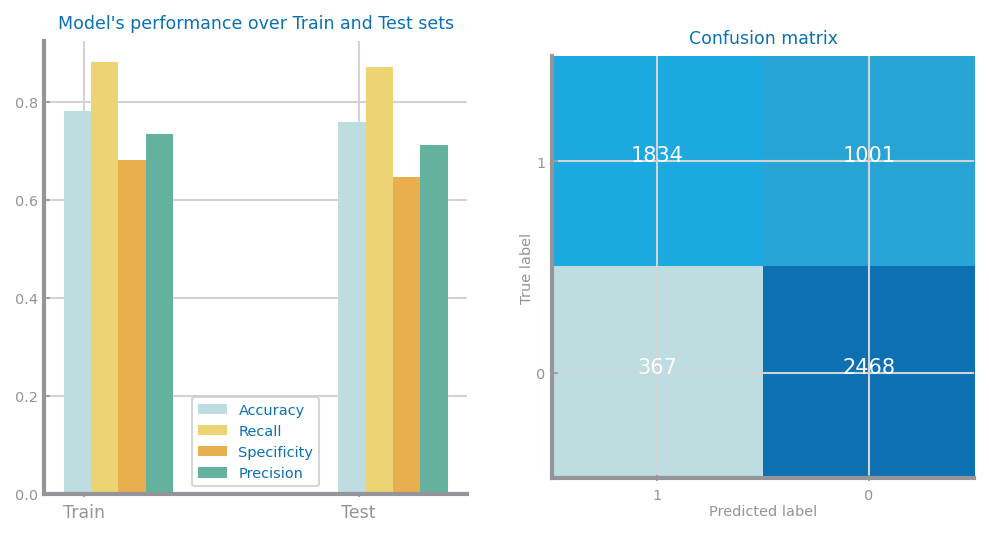

In [18]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = GaussianNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

1.0 0.8
Confusion Matrix Test
TruePositives:  1806
FalsePositives:  397
TrueNegatives:  2406
FalseNegatives:  997


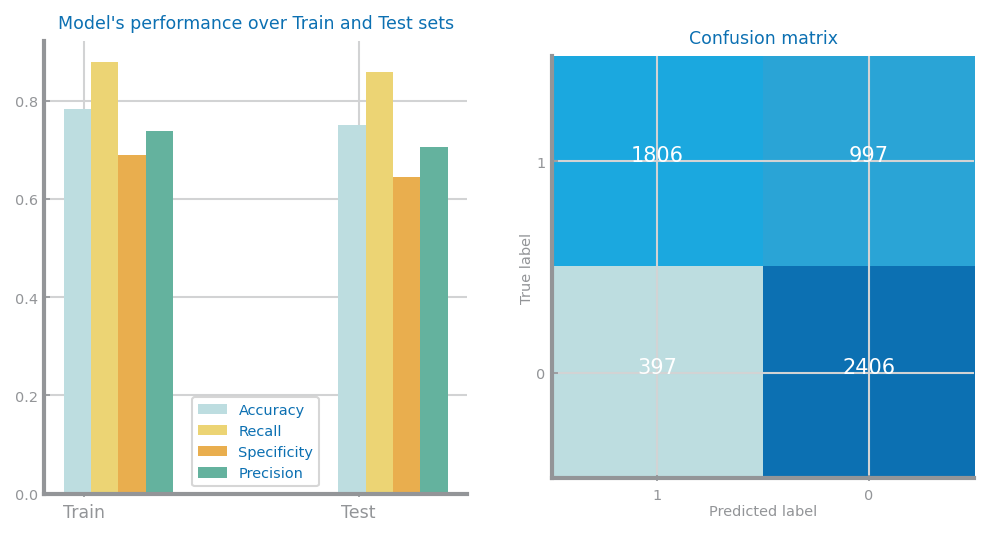

In [19]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = GaussianNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Bernoulli

0.4 0.1
Confusion Matrix Test
TruePositives:  98
FalsePositives:  83
TrueNegatives:  2734
FalseNegatives:  2719


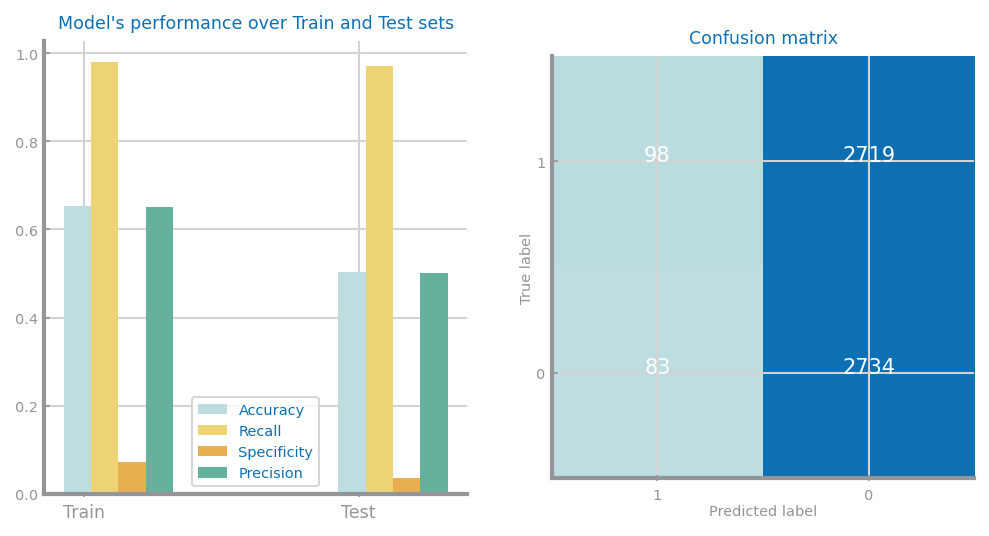

In [20]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = BernoulliNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

1.0 0.6000000000000001
Confusion Matrix Test
TruePositives:  2126
FalsePositives:  776
TrueNegatives:  2154
FalseNegatives:  804


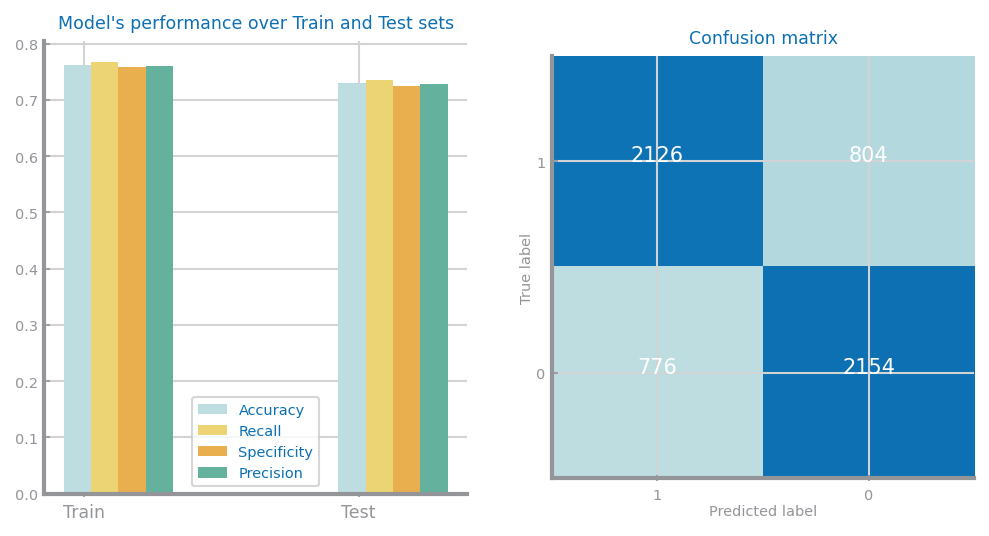

In [25]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = BernoulliNB()
best = [[],[],[],[]]
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        total=[0,0,0,0]
        total_trnY = []
        total_tstY = []
        total_prd_trn = []
        total_prd_tst = []
        for ix in range(100):
            trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            for yi in balanceY:
                total_trnY.append(yi)
            for yi in tstY:
                total_tstY.append(yi)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            for prdi in prd_trn:
                total_prd_trn.append(prdi)
            for prdi in prd_tst:
                total_prd_tst.append(prdi)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

        if avg_scores > best_acc:
            best[0] = copy.deepcopy(total_trnY)
            best[1] = copy.deepcopy(total_tstY)
            best[2] = copy.deepcopy(total_prd_trn)
            best[3] = copy.deepcopy(total_prd_tst)
            under_fact = undersample
            over_fact = oversample
            best_acc = avg_scores

print(under_fact,over_fact)
ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

# Scaling w/ outliers removal

## Outliers Removal

In [9]:
from numpy import percentile
def remove_outliers(data,threshold):
    data_rows = [0 for ix, row in data.iterrows()]
    data_features = data.copy()
    target = data_features.pop('DEATH_EVENT')
    outliers_num = 0
    rows_to_drop=set()
    for var in data_features:
        val_max = data_features[var].max()
        val_min = data_features[var].min()
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(data_features[var], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)


        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            count=0
            for ele in data_features[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    data_rows[count]+=1
                    if data_rows[count] > threshold:
                        outliers_num+=1
                        rows_to_drop.add(count)
                count+=1
                
    print("Threshold for outliers = ", threshold)
    print("Outliers number = ",outliers_num)
    clean_data = data_features.drop(rows_to_drop, axis=0)
    clean_targets = target.drop(rows_to_drop, axis=0)
    print(len(clean_data), " || ", len(clean_targets))
    return clean_data, clean_targets

In [40]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
target = 'DEATH_EVENT'

## Multinomial

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.2 0.0
Confusion Matrix Test
TruePositives:  1276
FalsePositives:  405
TrueNegatives:  1388
FalseNegatives:  517
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.5 0.1
Confusion Matrix Test
TruePositives:  1428
FalsePositives:  663
TrueNegatives:  2063
FalseNegatives:  1298
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.9 0.8
Confusion Matrix Test
TruePositives:  1401
FalsePositives:  691
TrueNegatives:  2192
FalseNegatives:  1482


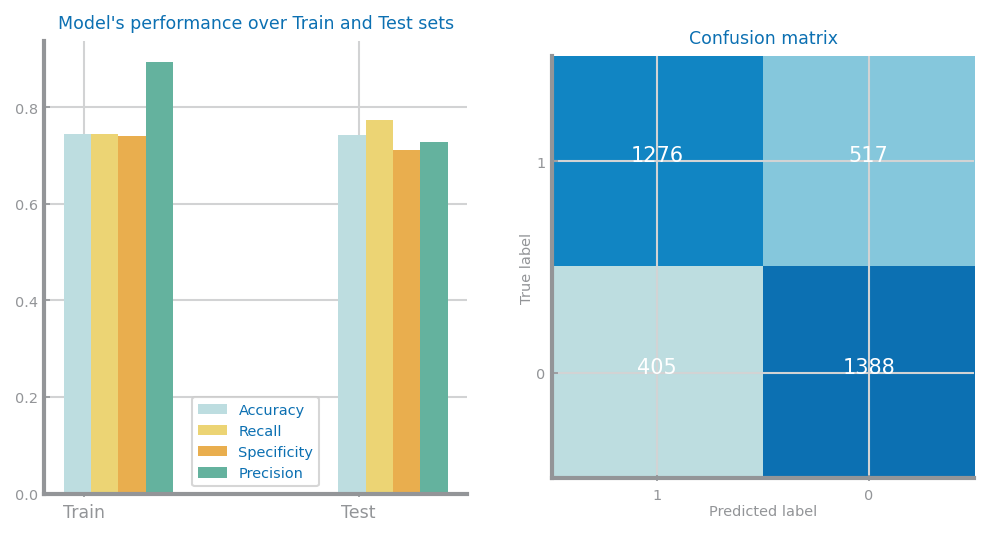

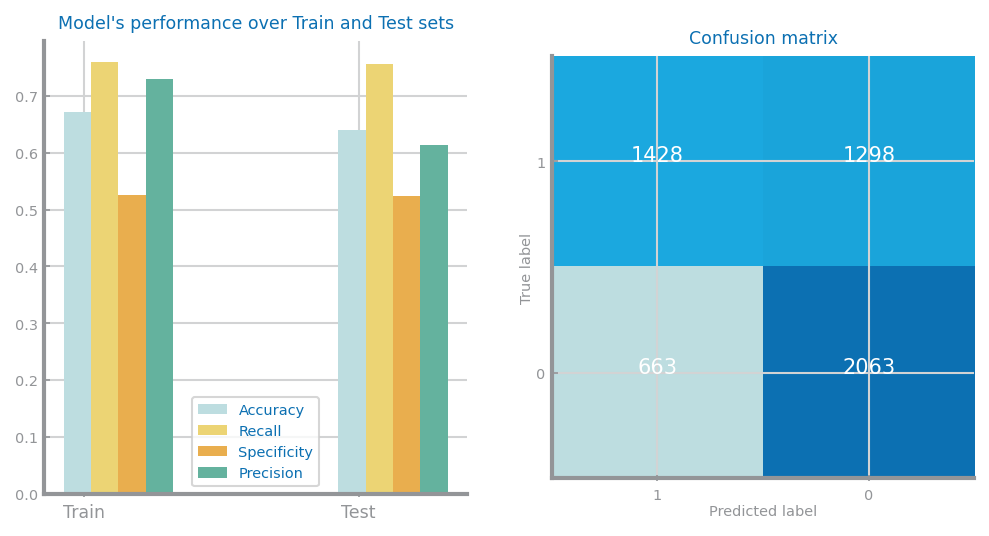

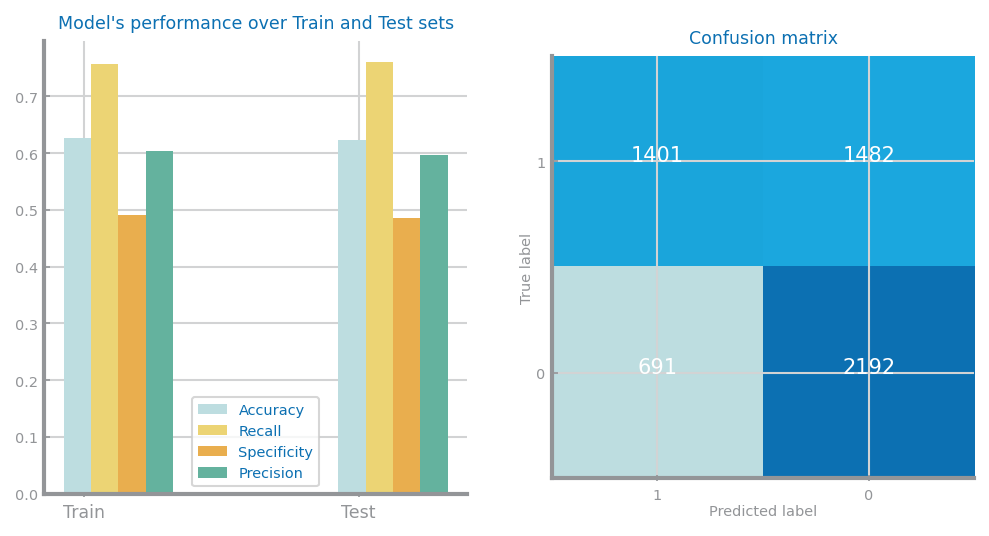

In [41]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = MultinomialNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Multinomial MinMax

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.4 1.0
Confusion Matrix Test
TruePositives:  1217
FalsePositives:  413
TrueNegatives:  1354
FalseNegatives:  550
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 1.0
Confusion Matrix Test
TruePositives:  1866
FalsePositives:  651
TrueNegatives:  2065
FalseNegatives:  850
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.4 1.0
Confusion Matrix Test
TruePositives:  1937
FalsePositives:  703
TrueNegatives:  2118
FalseNegatives:  884


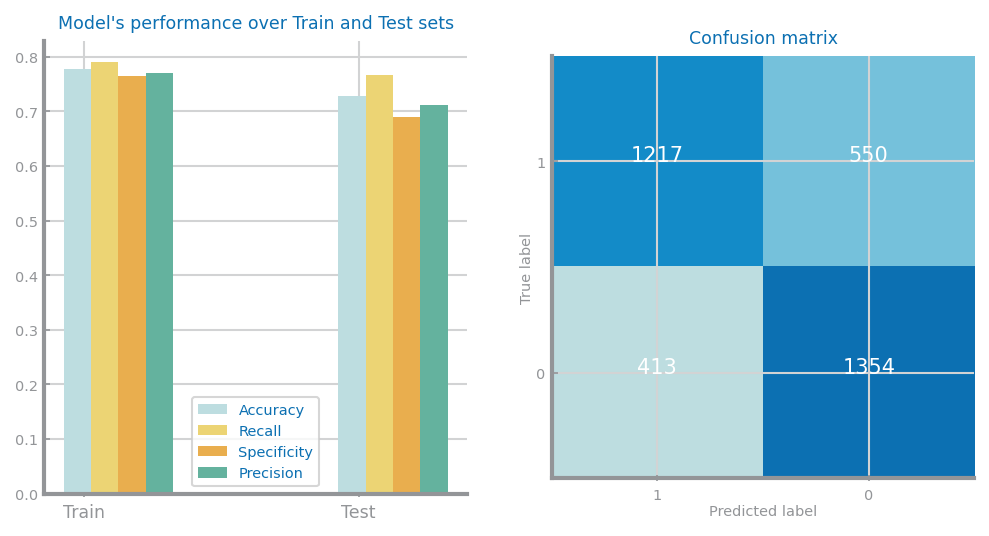

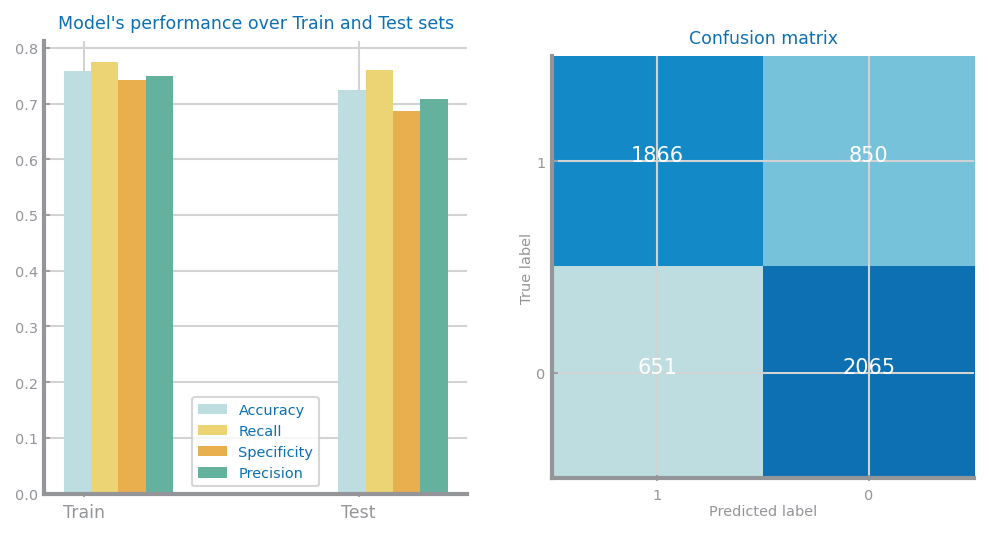

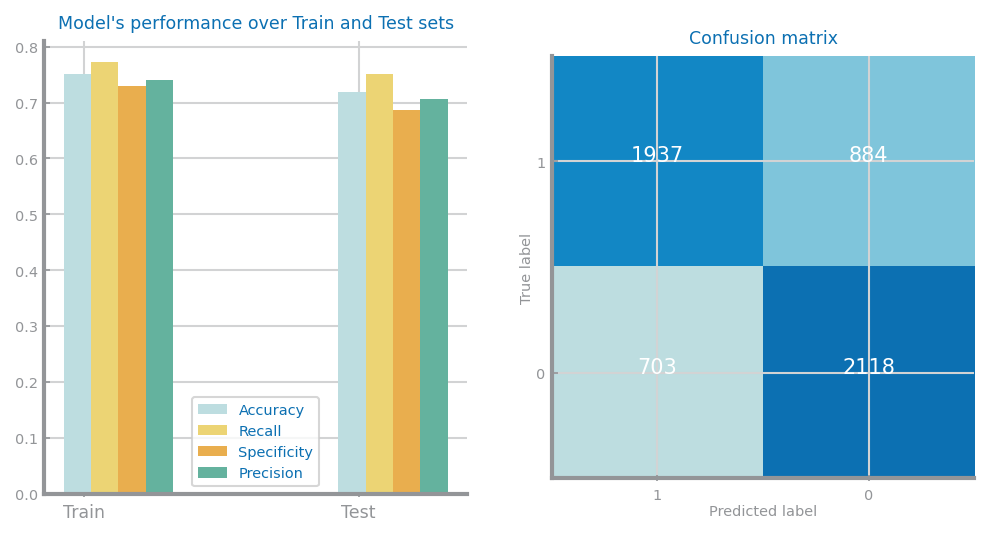

In [42]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_minmax = df_nr
    XmM: np.ndarray = norm_data_minmax.values
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = MultinomialNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian 

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.30000000000000004 0.5
Confusion Matrix Test
TruePositives:  1355
FalsePositives:  251
TrueNegatives:  1564
FalseNegatives:  460
Threshold for outliers =  1
Outliers number =  10
289  ||  289
1.0 1.0
Confusion Matrix Test
TruePositives:  2043
FalsePositives:  408
TrueNegatives:  2325
FalseNegatives:  690
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.0 0.9
Confusion Matrix Test
TruePositives:  2016
FalsePositives:  352
TrueNegatives:  2504
FalseNegatives:  840


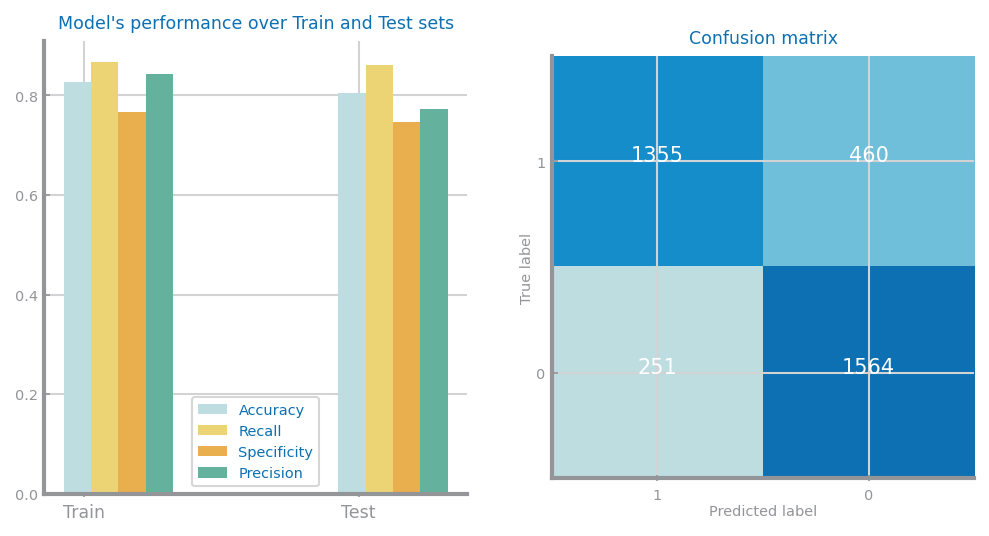

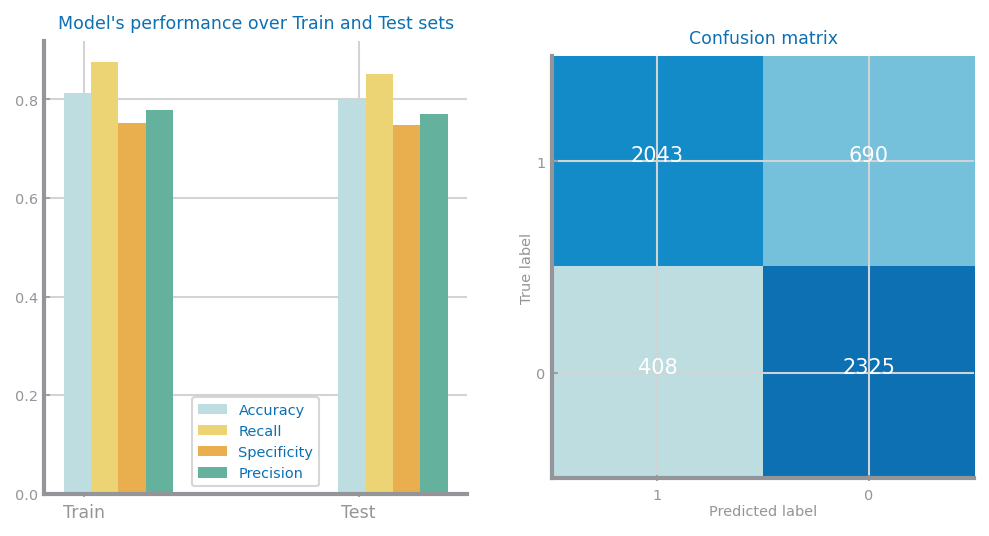

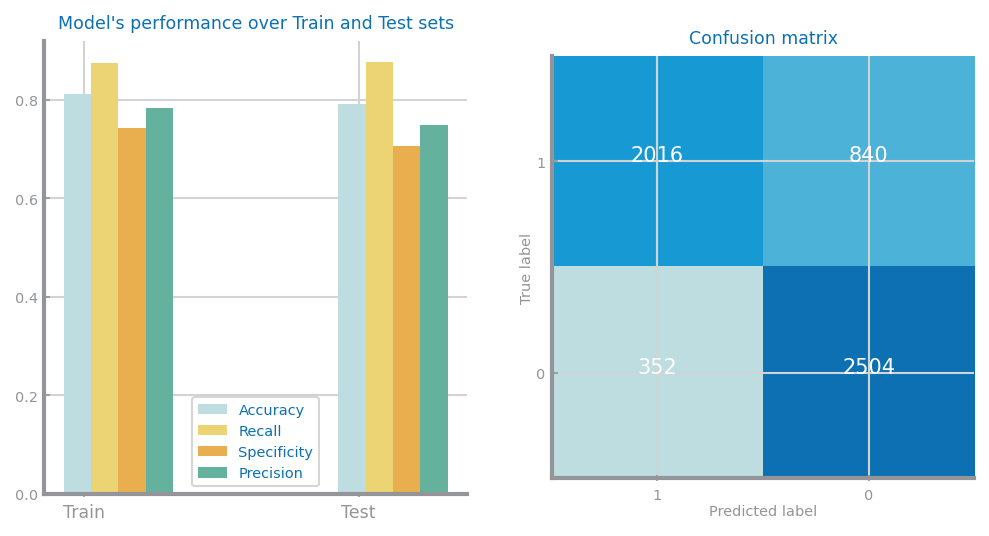

In [43]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian Z-Score

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.30000000000000004 0.9
Confusion Matrix Test
TruePositives:  1433
FalsePositives:  301
TrueNegatives:  1585
FalseNegatives:  453
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 0.7000000000000001
Confusion Matrix Test
TruePositives:  1691
FalsePositives:  274
TrueNegatives:  2382
FalseNegatives:  965
Threshold for outliers =  2
Outliers number =  0
299  ||  299
1.0 0.4
Confusion Matrix Test
TruePositives:  1885
FalsePositives:  394
TrueNegatives:  2473
FalseNegatives:  982


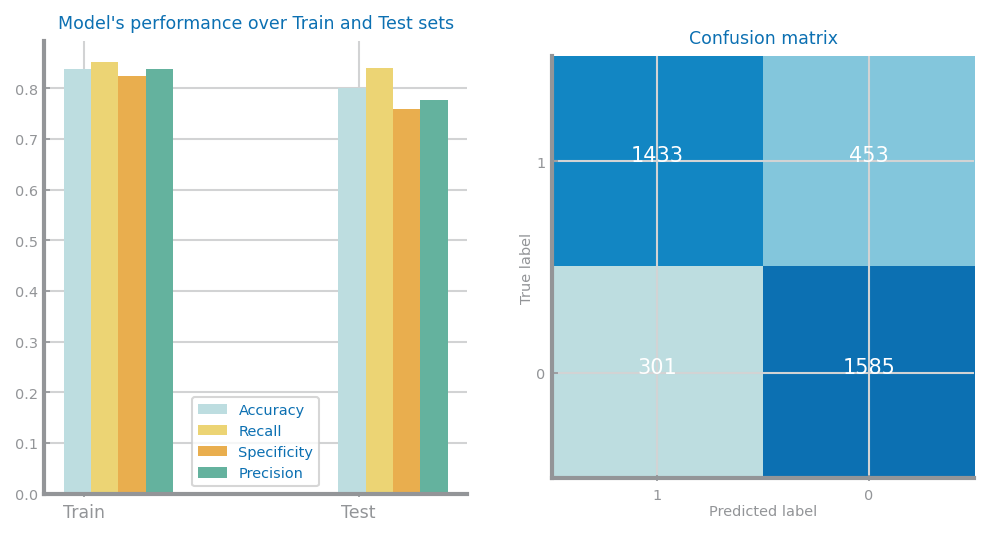

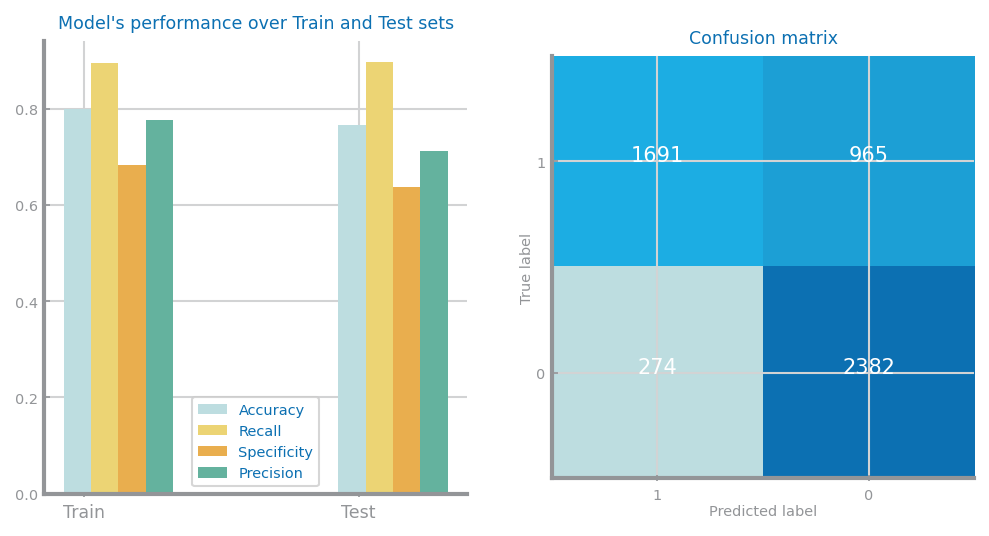

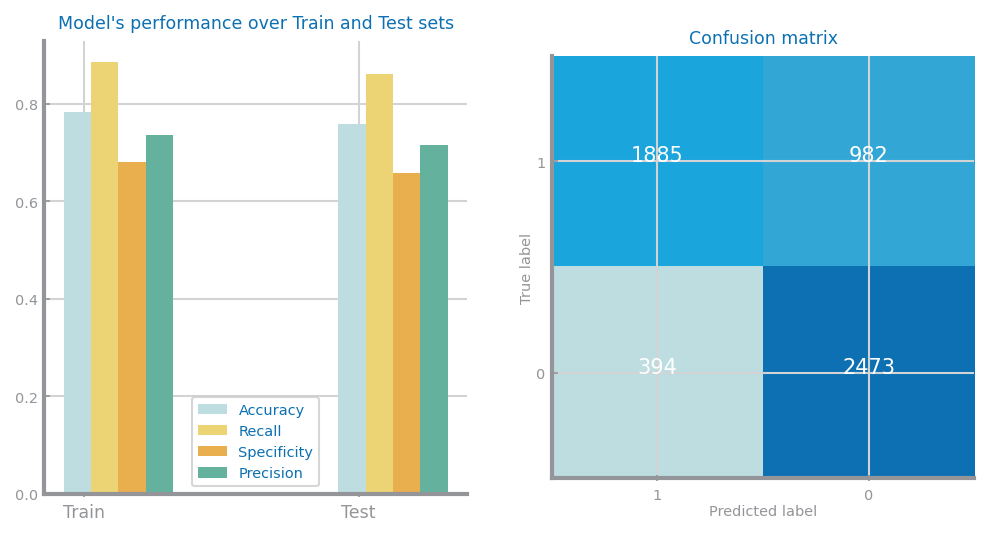

In [44]:
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_zscore = df_nr
    norm_data_zscore.describe(include='all')
    
    Xz: np.ndarray = norm_data_zscore.values
        
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian MinMax

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.6000000000000001 0.7000000000000001
Confusion Matrix Test
TruePositives:  1378
FalsePositives:  277
TrueNegatives:  1545
FalseNegatives:  444
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 1.0
Confusion Matrix Test
TruePositives:  1865
FalsePositives:  354
TrueNegatives:  2410
FalseNegatives:  899
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.5 1.0
Confusion Matrix Test
TruePositives:  1807
FalsePositives:  326
TrueNegatives:  2571
FalseNegatives:  1090


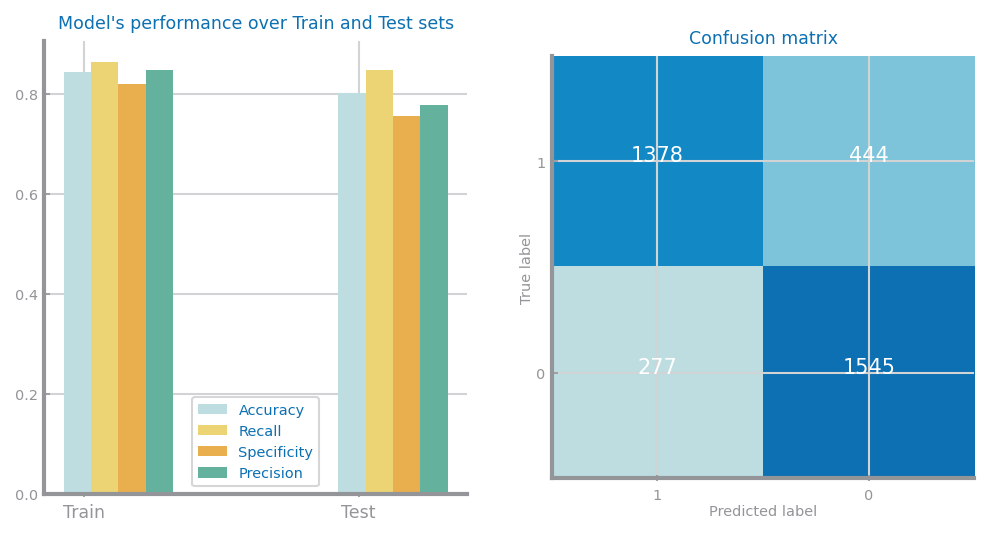

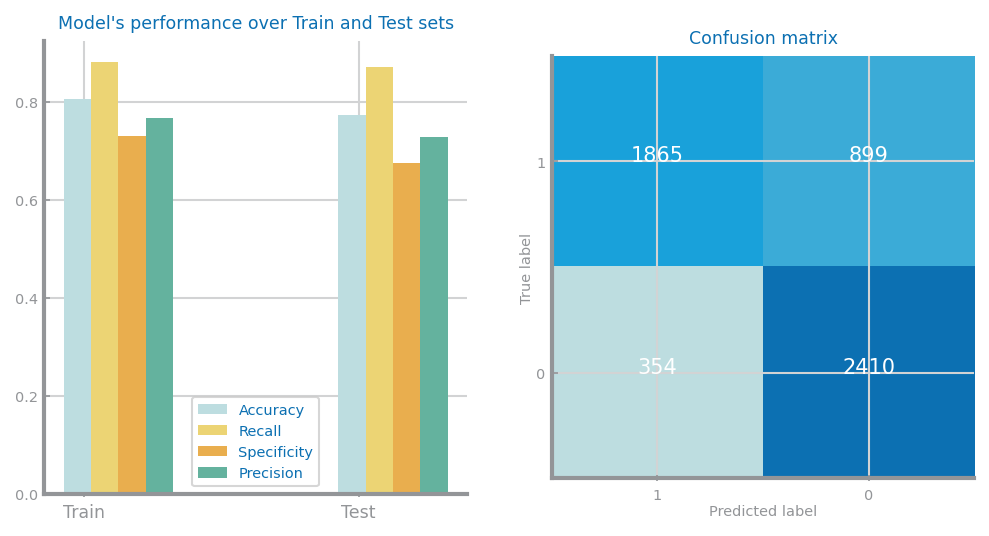

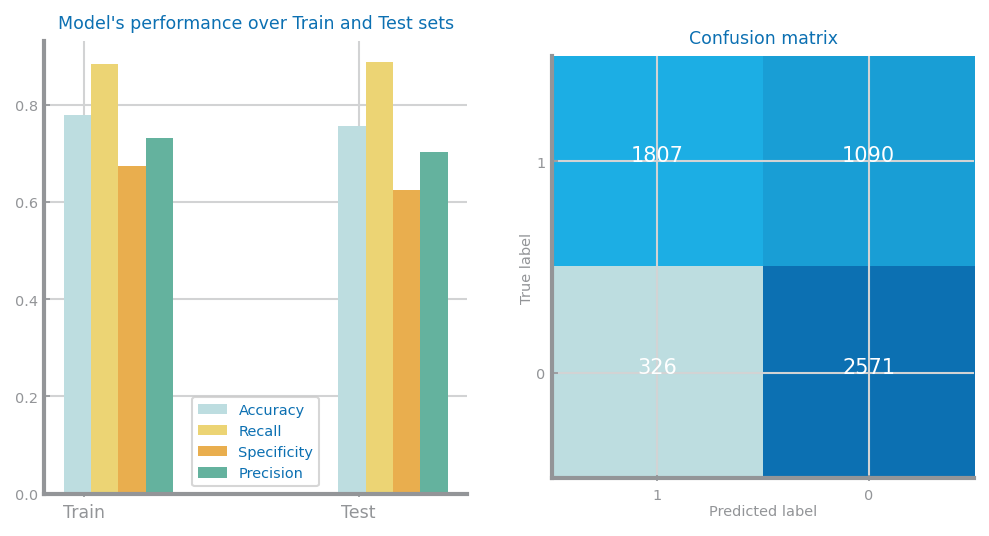

In [45]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_minmax = df_nr
    XmM: np.ndarray = norm_data_minmax.values
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Bernoulli

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.5 0.9
Confusion Matrix Test
TruePositives:  719
FalsePositives:  712
TrueNegatives:  1130
FalseNegatives:  1123
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 1.0
Confusion Matrix Test
TruePositives:  1222
FalsePositives:  1192
TrueNegatives:  1558
FalseNegatives:  1528
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.30000000000000004 0.2
Confusion Matrix Test
TruePositives:  81
FalsePositives:  80
TrueNegatives:  2784
FalseNegatives:  2783


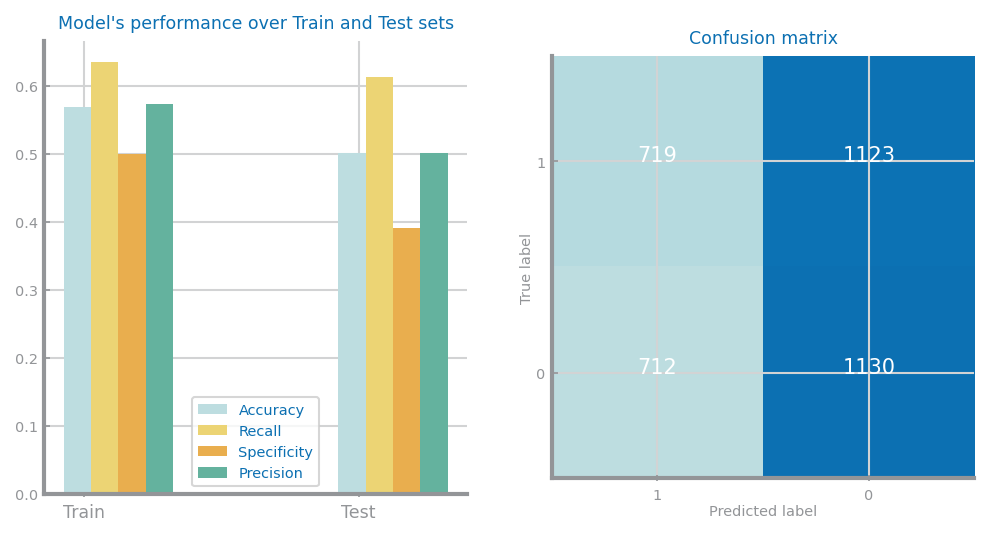

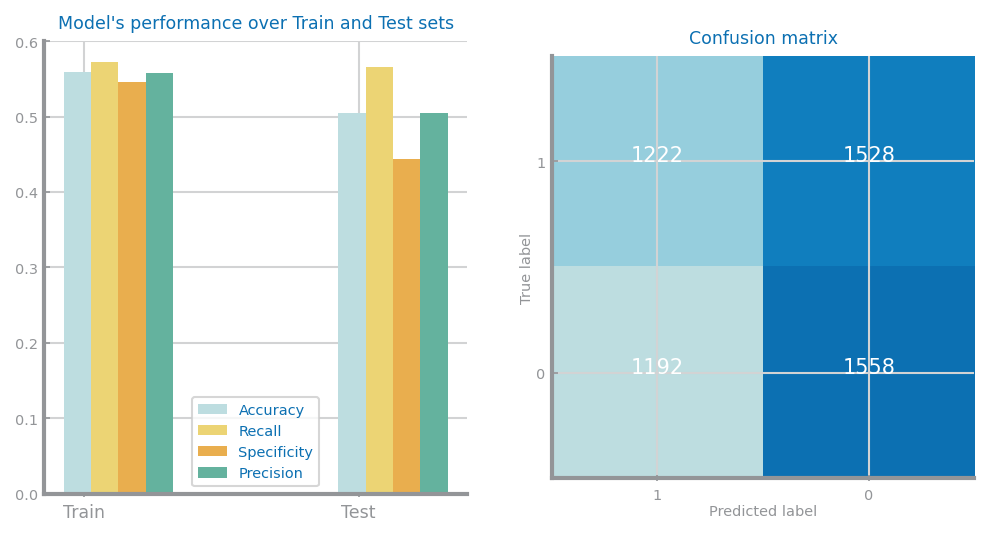

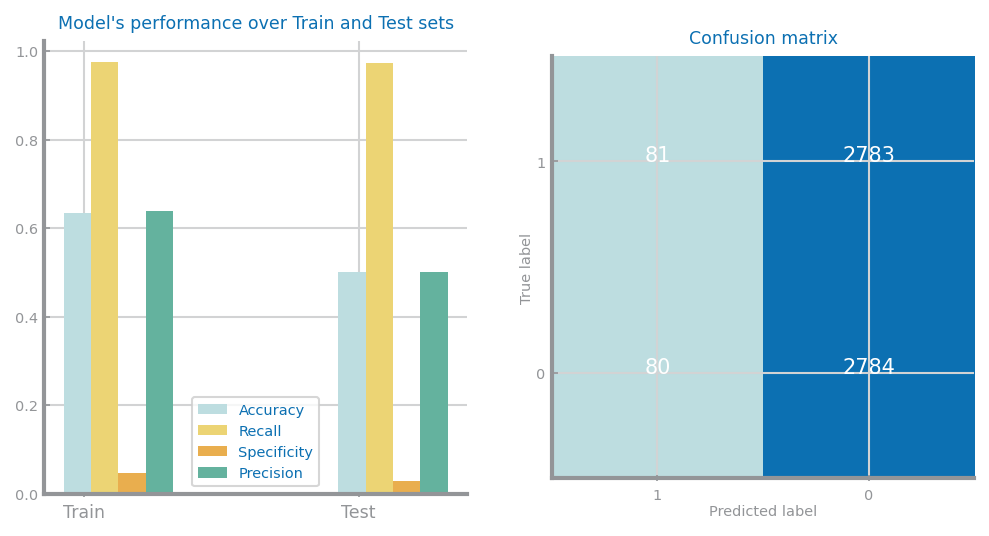

In [46]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(X, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Bernoulli Z-Score

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.9 0.5
Confusion Matrix Test
TruePositives:  1205
FalsePositives:  499
TrueNegatives:  1322
FalseNegatives:  616
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.30000000000000004 0.8
Confusion Matrix Test
TruePositives:  1818
FalsePositives:  612
TrueNegatives:  2056
FalseNegatives:  850
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.9 0.9
Confusion Matrix Test
TruePositives:  2028
FalsePositives:  734
TrueNegatives:  2149
FalseNegatives:  855


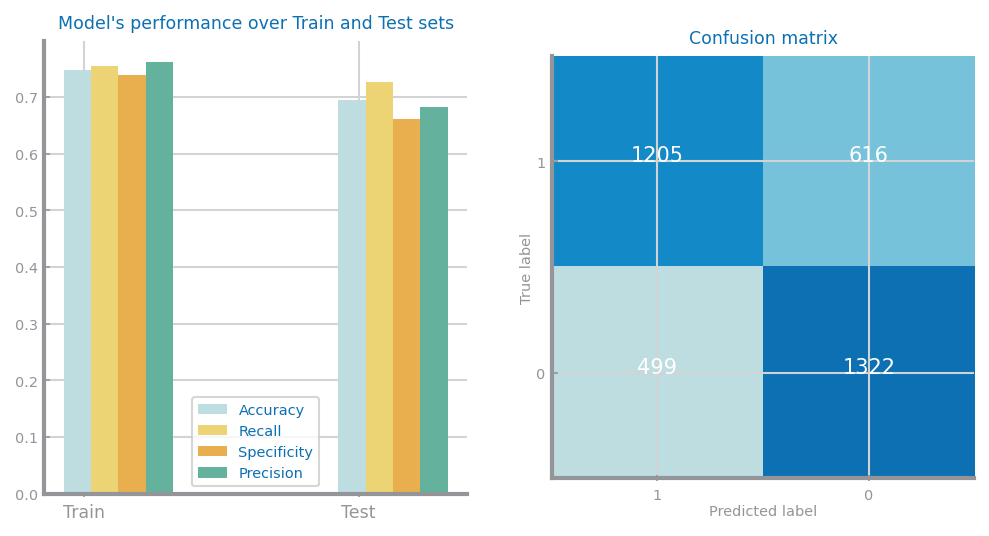

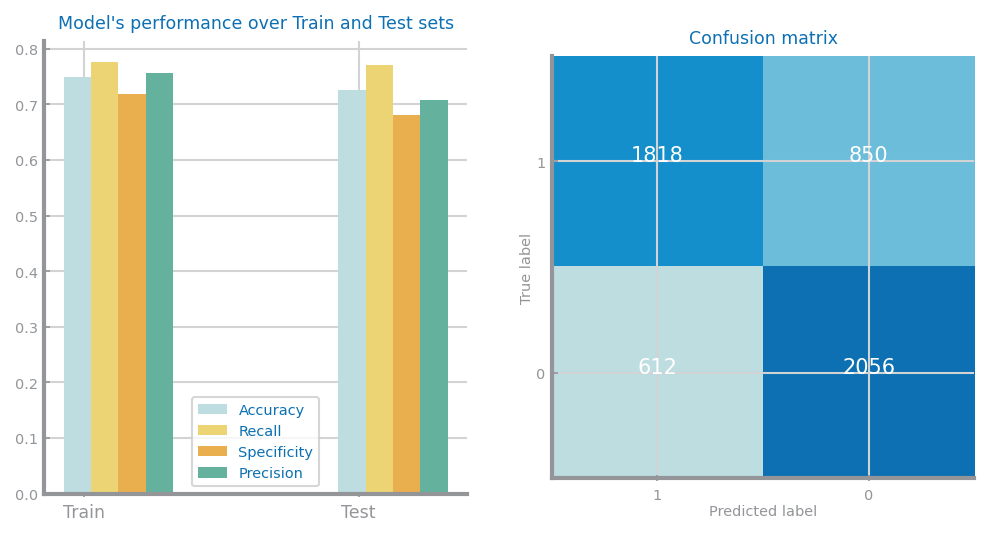

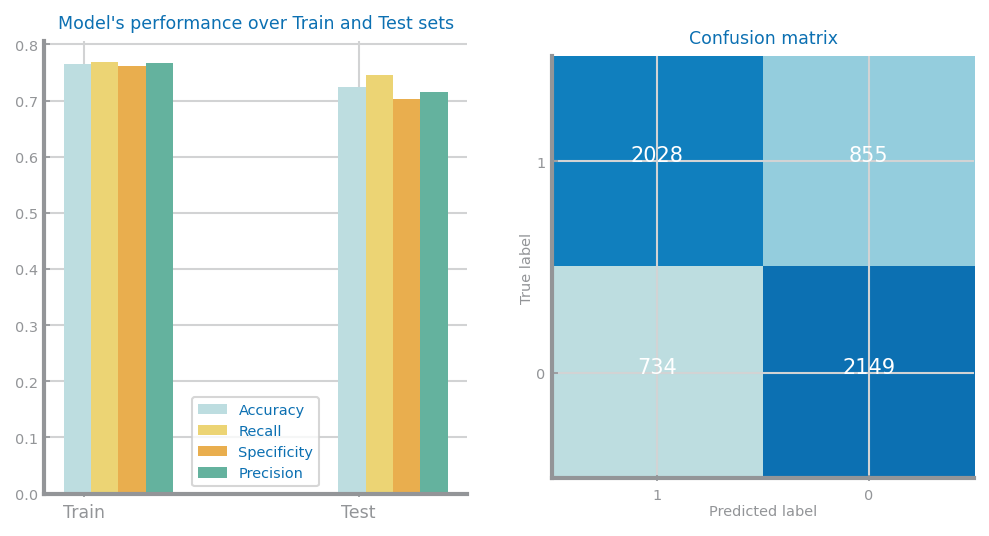

In [47]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_zscore = df_nr
    norm_data_zscore.describe(include='all')
    
    Xz: np.ndarray = norm_data_zscore.values
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Bernoulli MinMax

Threshold for outliers =  0
Outliers number =  85
224  ||  224
1.0 0.6000000000000001
Confusion Matrix Test
TruePositives:  931
FalsePositives:  901
TrueNegatives:  929
FalseNegatives:  899
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.2 0.8
Confusion Matrix Test
TruePositives:  842
FalsePositives:  817
TrueNegatives:  1925
FalseNegatives:  1900
Threshold for outliers =  2
Outliers number =  0
299  ||  299
0.5 0.2
Confusion Matrix Test
TruePositives:  249
FalsePositives:  218
TrueNegatives:  2634
FalseNegatives:  2603


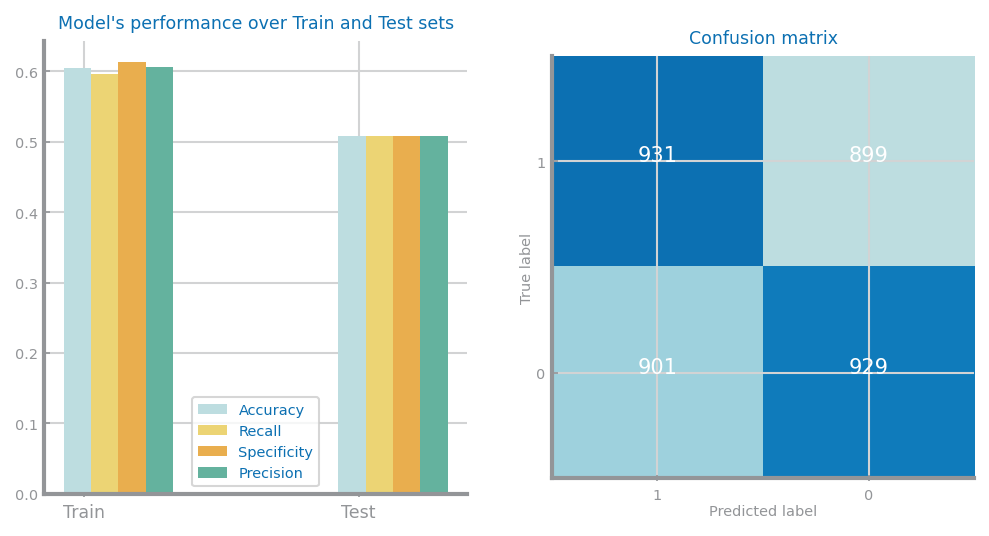

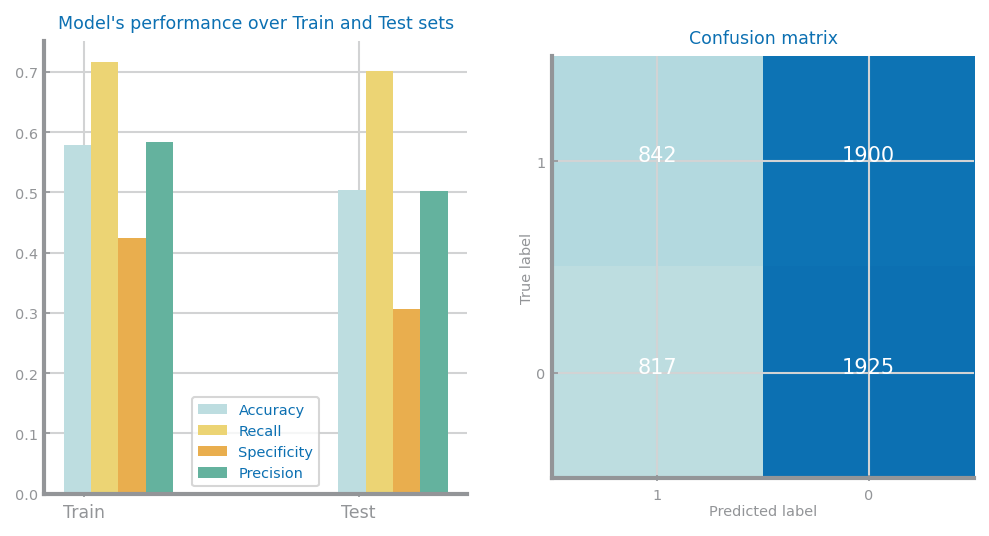

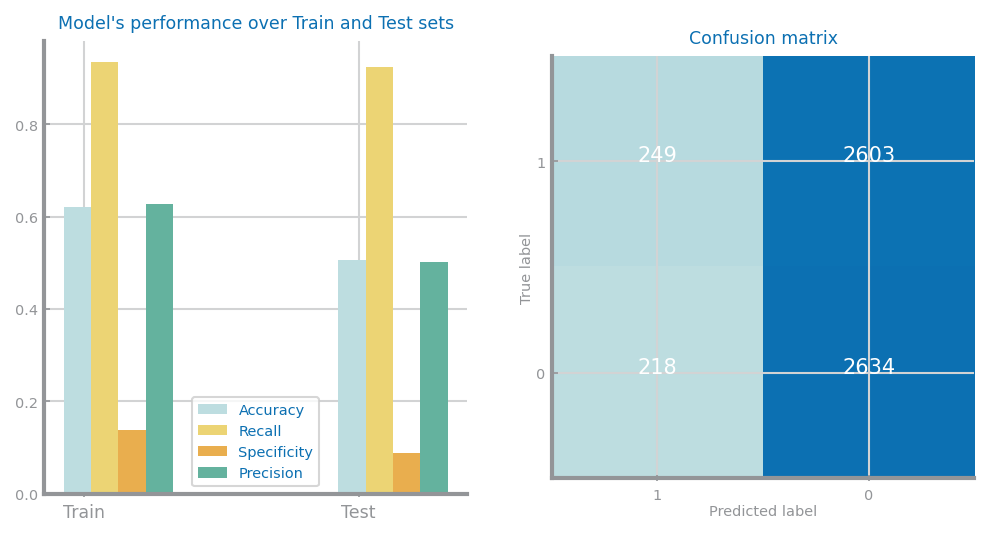

In [48]:
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_minmax = df_nr
    XmM: np.ndarray = norm_data_minmax.values
    
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = BernoulliNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(XmM, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

    print(under_fact,over_fact)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

# Feature Selection - SFS/SBS

## Gaussian Z-Score (SFS)

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.0 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.30000000000000004 0.8 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.30000000000000004 0.8 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.30000000000000004 0.8 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.30000000000000004 0.8 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.7000000000000001 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.7000000000000001 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.7000000000000001 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
0.7000000000000001 0.7000000000000001 (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)
Confusion Matrix Test
TruePositives:  1335
FalsePositives:  278
TrueNegatives:  1483
FalseNegatives:  426
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 0.9 (0, 4, 5, 8, 10, 11)
0.0 0.9 (0, 4, 5, 8, 10, 1

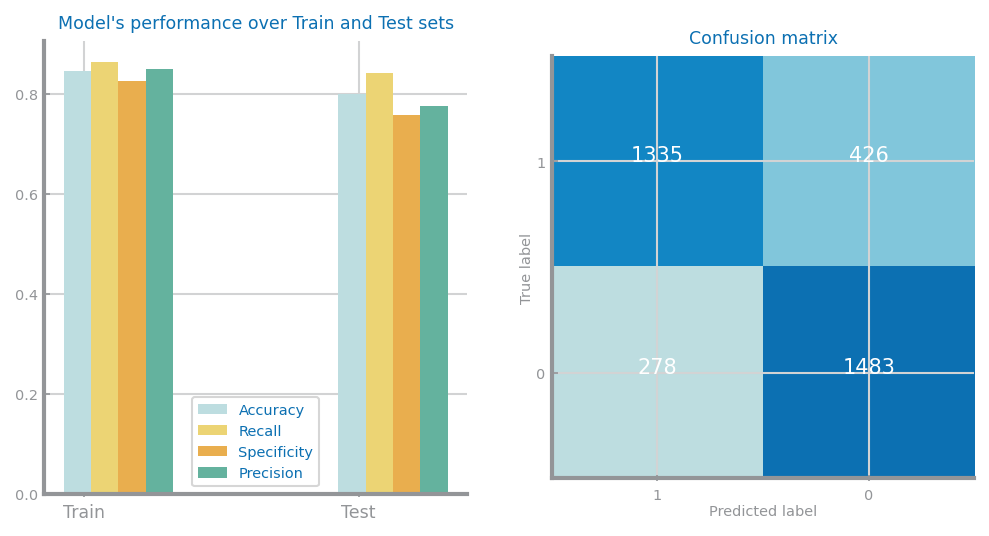

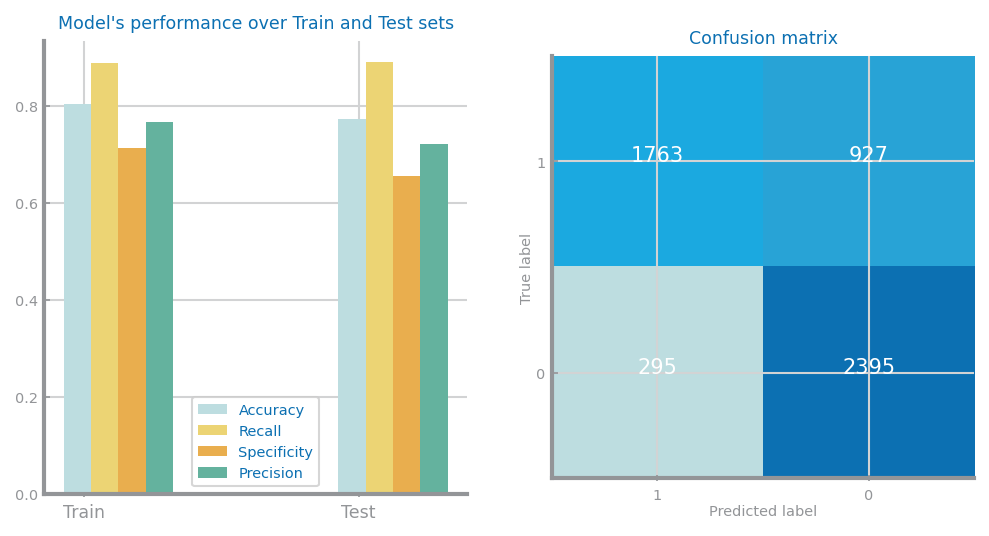

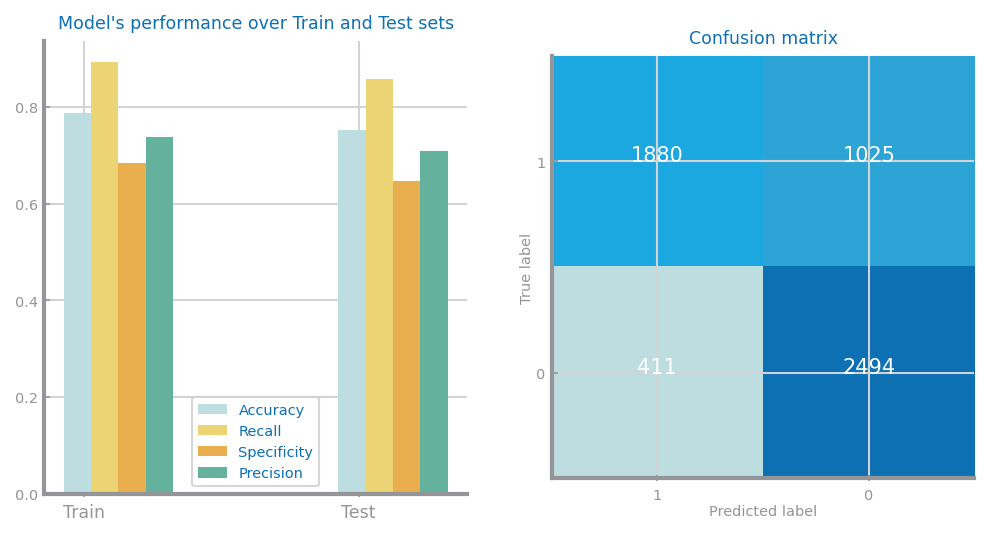

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_zscore = df_nr
    norm_data_zscore.describe(include='all')
    
    Xz: np.ndarray = norm_data_zscore.values
        
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            sfs1 = SFS(clf, 
                       k_features=(1,Xz.shape[1]), 
                       forward=True, # if forward = True then SFS otherwise SBS
                       scoring='accuracy'
                       ).fit(Xz,y)
            
            for ix in range(Xz.shape[1],0):
                if ix not in sfs1.k_feature_idx_:
                    X = np.delete(X,ix,1)
                    
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

        print(under_fact, over_fact, sfs1.k_feature_idx_)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

## Gaussian Z-Score (SBS)

Threshold for outliers =  0
Outliers number =  85
224  ||  224
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
0.0 1.0 (0, 1, 3, 4, 5, 7, 8, 9, 10, 11)
Confusion Matrix Test
TruePositives:  1357
FalsePositives:  286
TrueNegatives:  1500
FalseNegatives:  429
Threshold for outliers =  1
Outliers number =  10
289  ||  289
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11)
0.0 1.0 (0, 4, 5, 8, 10, 11

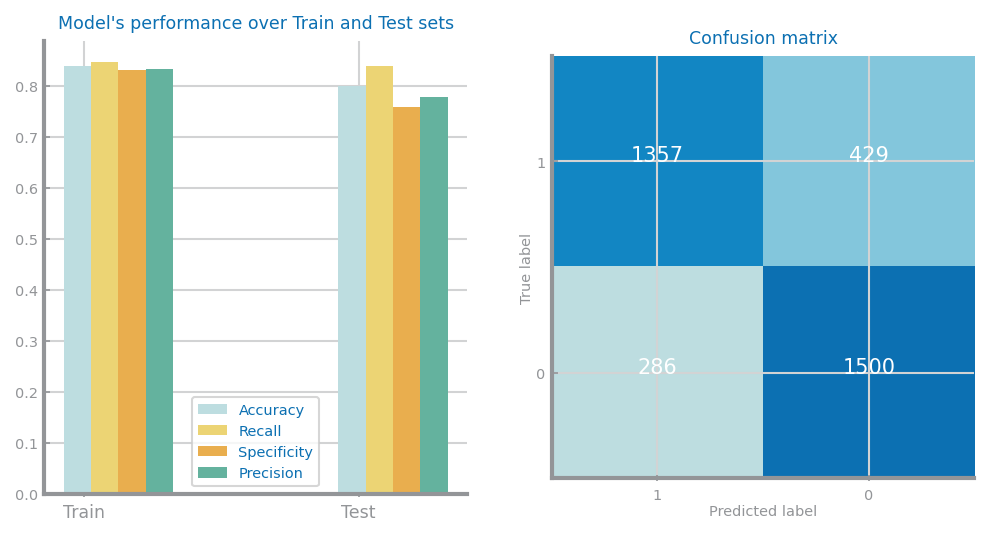

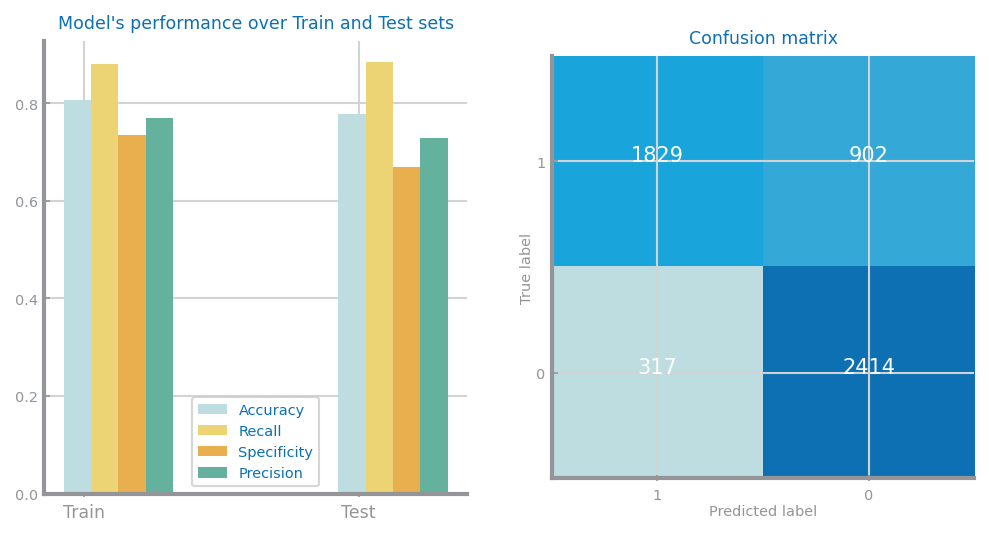

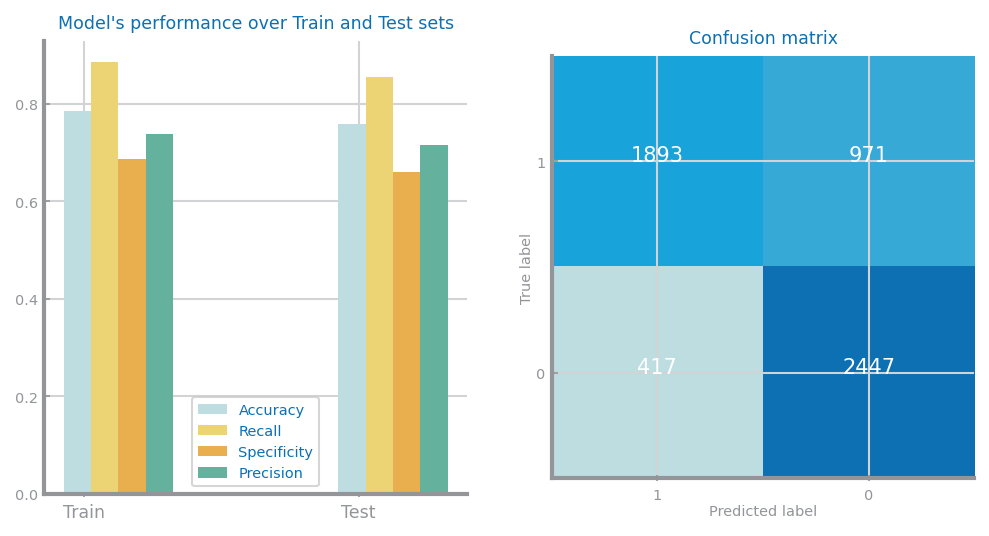

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#MultinomialNB cannot compute negative values.
best_acc = 0
under_fact = 0
over_fact = 0
threshold_fact = 0
for threshold in range(0,3):
    
    X_clean, y_clean = remove_outliers(data,threshold)
    X: np.ndarray = X_clean.values
    y: np.ndarray = y_clean.values
    labels: np.ndarray = pd.unique(y)
    
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(X_clean)
    df_nr = pd.DataFrame(transf.transform(X_clean), columns= X_clean.columns)
    norm_data_zscore = df_nr
    norm_data_zscore.describe(include='all')
    
    Xz: np.ndarray = norm_data_zscore.values
        
    undersample_range = [x*0.1 for x in range(11)]
    oversample_range = [x*0.1 for x in range(11)]
    clf = GaussianNB()
    best = [[],[],[],[]]
    best_acc = 0
    under_fact = 0
    over_fact = 0
    for undersample in undersample_range:
        for oversample in oversample_range:
            total=[0,0,0,0]
            sfs1 = SFS(clf, 
                       k_features=(1,Xz.shape[1]), 
                       forward=False, # if forward = True then SFS otherwise SBS
                       scoring='accuracy'
                       ).fit(Xz,y)
            
            for ix in range(Xz.shape[1],0):
                if ix not in sfs1.k_feature_idx_:
                    X = np.delete(X,ix,1)
                    
            total_trnY = []
            total_tstY = []
            total_prd_trn = []
            total_prd_tst = []
            for ix in range(100):
                trnX, tstX, trnY, tstY = split_balanced(Xz, y, 0.7)
                balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
                for yi in balanceY:
                    total_trnY.append(yi)
                for yi in tstY:
                    total_tstY.append(yi)
                clf.fit(balanceX, balanceY)
                prd_trn = clf.predict(balanceX)
                prd_tst = clf.predict(tstX)
                for prdi in prd_trn:
                    total_prd_trn.append(prdi)
                for prdi in prd_tst:
                    total_prd_tst.append(prdi)
                cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
                tn, fp, fn, tp = cnf_mtx_tst.ravel()
                total[0]+=tp
                total[1]+=tn
                total[2]+=fp
                total[3]+=fn


            avg_scores = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])

            if avg_scores > best_acc:
                best[0] = copy.deepcopy(total_trnY)
                best[1] = copy.deepcopy(total_tstY)
                best[2] = copy.deepcopy(total_prd_trn)
                best[3] = copy.deepcopy(total_prd_tst)
                under_fact = undersample
                over_fact = oversample
                best_acc = avg_scores

        print(under_fact, over_fact, sfs1.k_feature_idx_)
    ds.plot_evaluation_results(pd.unique(y), best[0], best[2], best[1], best[3])

In [11]:
import random
def split_balanced(X,y,train_size):
    X = X.tolist()
    y = y.tolist()
    random.seed()
    trn_size = len(X)*train_size
    tstX = []
    tstY = []
    trnX = []
    trnY = []
    while len(trnX)<trn_size:
        rand_num = random.randint(0,len(X)-1)
        trnX.append(X.pop(rand_num))
        trnY.append(y.pop(rand_num))
    
    y_01 = [[],[]]
    for ix in range(len(y)):
        y_01[y[ix]].append(X[ix])
    
    while len(y_01[0]) != 0 and len(y_01[1]) != 0:
        rand_num_0 = random.randint(0,len(y_01[0])-1)
        rand_num_1 = random.randint(0,len(y_01[1])-1)
        tstX.append(y_01[0].pop(rand_num_0))
        tstY.append(0)
        tstX.append(y_01[1].pop(rand_num_1))
        tstY.append(1)
        
    for ix in range(len(y_01[0])):
        trnX.append(y_01[0][ix])
        trnY.append(0)
        
    for ix in range(len(y_01[1])):
        trnX.append(y_01[1][ix])
        trnY.append(1)
        
    return trnX, tstX, trnY, tstY